In [1]:
# import libraries 
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import keras as keras
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images and set data path
IMAGE_SIZE = (224, 224, 3)

data_dir = "C:\\Users\\omark\\OneDrive\\Desktop\\Dataset"

In [3]:
# Impor MobileNetV2 library
mobilenet = MobileNetV2(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in mobilenet.layers:
    layer.trainable = False

In [5]:
# getting number of output classes
folders = glob('C:\\Users\\omark\\OneDrive\\Desktop\\Dataset/*')

In [6]:
# Check classes
folders

['C:\\Users\\omark\\OneDrive\\Desktop\\Dataset\\covid-19',
 'C:\\Users\\omark\\OneDrive\\Desktop\\Dataset\\normal',
 'C:\\Users\\omark\\OneDrive\\Desktop\\Dataset\\Pneumonia']

In [17]:
# Set our layers
x = Flatten()(mobilenet.output)
x = keras.layers.Dropout(0.2)(x)

In [18]:
# Prediction lauer
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilenet.input, outputs=prediction)

In [19]:
# set cost and optimization method 
model.compile(
  loss="categorical_crossentropy",
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split = 0.25,
                                   horizontal_flip = True)

In [21]:
# Train set
training_set = train_datagen.flow_from_directory(data_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 subset = "training",
                                                 class_mode = 'categorical')

Found 2514 images belonging to 3 classes.


In [22]:
# Validation set
validation_set = train_datagen.flow_from_directory(data_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 subset = "validation",
                                                 class_mode = 'categorical')

Found 837 images belonging to 3 classes.


In [23]:
# Check classes
training_set.class_indices

{'Pneumonia': 0, 'covid-19': 1, 'normal': 2}

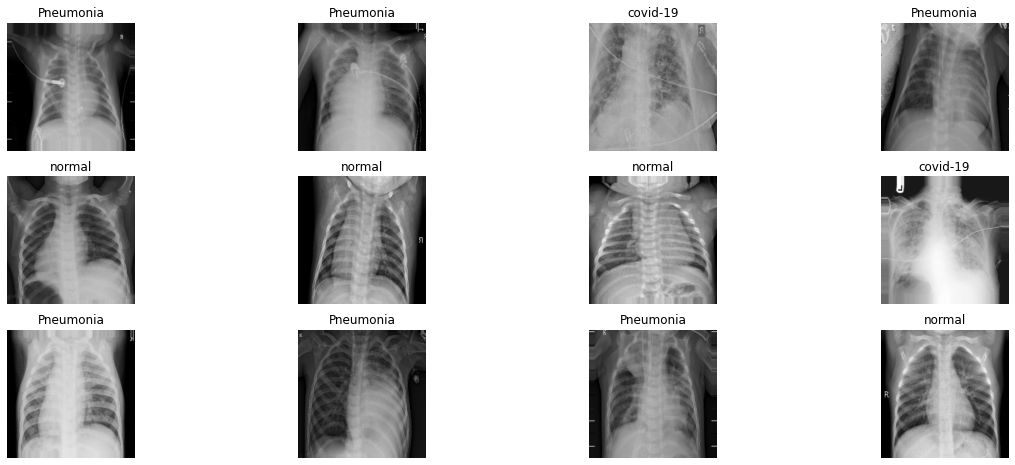

In [14]:
labels = ["Pneumonia", "covid-19","normal"]
sample_data = training_set.__getitem__(1)[0] 
sample_label = training_set.__getitem__(1)[1] 

plt.figure(figsize=(20,8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.axis('off')
    plt.imshow(sample_data[i])
    plt.title(labels[np.argmax(sample_label[i])])

In [24]:
# fit the model
# When training accuracy is increase, at the same time validation accuracy is also increase.
# val_accuracy 0.9164
r = model.fit_generator(
  training_set,
  validation_data=validation_set,
  epochs=10,
)

Epoch 1/10
79/79 [==============================] - 57s 636ms/step - loss: 2.0363 - accuracy: 0.7993 - val_loss: 1.0395 - val_accuracy: 0.8722
Epoch 2/10
79/79 [==============================] - 45s 579ms/step - loss: 0.5913 - accuracy: 0.9184 - val_loss: 0.8856 - val_accuracy: 0.8817
Epoch 3/10
79/79 [==============================] - 46s 588ms/step - loss: 0.7052 - accuracy: 0.9182 - val_loss: 0.7835 - val_accuracy: 0.9247
Epoch 4/10
79/79 [==============================] - 47s 598ms/step - loss: 0.8313 - accuracy: 0.9305 - val_loss: 1.2845 - val_accuracy: 0.9008
Epoch 5/10
79/79 [==============================] - 46s 586ms/step - loss: 0.5086 - accuracy: 0.9469 - val_loss: 1.6523 - val_accuracy: 0.8913
Epoch 6/10
79/79 [==============================] - 48s 607ms/step - loss: 0.6172 - accuracy: 0.9438 - val_loss: 1.2458 - val_accuracy: 0.9140
Epoch 7/10
79/79 [==============================] - 53s 673ms/step - loss: 0.4885 - accuracy: 0.9505 - val_loss: 1.1233 - val_accuracy: 0.9044

In [25]:
# Save model
model.save("COVID_Pneumonia.h5")

C:\Users\omark\anaconda3\envs\gputest\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
